In [24]:
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential

# Load Dataset

In [6]:
x_train = np.loadtxt('input.csv', delimiter = ',')
y_train = np.loadtxt('labels.csv', delimiter = ',')

x_test = np.loadtxt('input_test.csv', delimiter = ',')
y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [9]:
# should re shape into appropriate image sizes
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

In [11]:
# right now the image values are in 0-255 but for training we have to rescale it to the range 0-1
x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
print("shape of X_train: ", x_train.shape)
print("shape of Y_train: ", y_train.shape)
print("shape of X_test: ", x_test.shape)
print("shape of Y_test: ", y_test.shape)

shape of X_train:  (2000, 100, 100, 3)
shape of Y_train:  (2000, 1)
shape of X_test:  (400, 100, 100, 3)
shape of Y_test:  (400, 1)


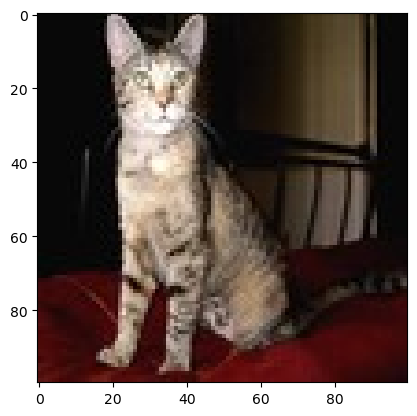

In [18]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

# Model

In [28]:
# method 01 - define the layers seporated by comma
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [26]:
# method 02 - add the layers manually
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Users/shakthiraveen/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [30]:
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [32]:
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.8195 - loss: 0.3967
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.8539 - loss: 0.3320
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.8433 - loss: 0.3508
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.9199 - loss: 0.2199
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - accuracy: 0.9395 - loss: 0.1905


In [33]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6186 - loss: 1.0317


[0.7868891358375549, 0.6700000166893005]

# Making predictions with individual images

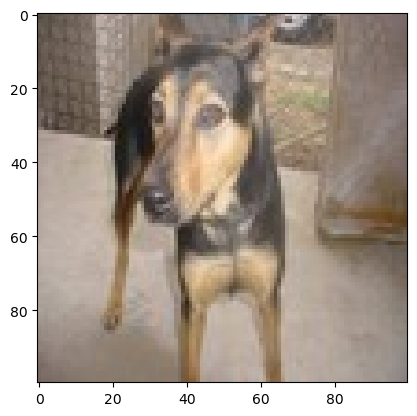

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[0.02708273]]


In [35]:
idx2 = random.randint(0, len(y_test))

plt.imshow(x_test[idx2,:])
plt.show()

y_pred = model.predict(x_test[idx2,:].reshape(1, 100, 100, 3))
print(y_pred)

y_pred = y_pred > 0.5

if y_pred == 0:
    pred = 'dog'
else :
    pred = 'cat'
    
print('our model ')